# Data curation

In [2]:
!pip install pandas
!pip install matplotlib

/home/ferraz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/ferraz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 11.5 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 33.2 MB/s eta 0:00:01
/home/ferraz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/ferraz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |███████████████████

In [1]:
from matplotlib import pyplot as plt
from glob import glob

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def group(df: pd.DataFrame, name: str, col: str = 'CLASSI_FIN') -> pd.DataFrame:
    aux = df.groupby(col).size().to_frame(name)
    aux = aux.rename({
        1: 'SRAG por influenza',
        2: 'SRAG por outro vírus respiratório',
        3: 'SRAG por outro agente Etiológico',
        4: 'SRAG não especificado',
        5: 'COVID-19',
        9: 'Indefinido',
    })
    aux.index.name = 'Classe'
    return aux

In [3]:
def cod2age(cod: int, tp: int = None) -> int:
    '''
    if tp is None, len(str(cod)) == 4
    first digit in cod is tp, where:
      1 = hour
      2 = days
      3 = months
      4 = years
    
    if tp is not None, then:
      1 = days
      2 = months
      3 = years
    '''
    offset = 0
    _aux = str(cod)

    if tp is None:
        tp = int(_aux[0]) - 1
        offset = 1
        
    if tp == 1: # 2 = days
        return int(_aux[offset:])//365
    elif tp == 2: # 3 = months
        return int(_aux[offset:])//12
    elif tp == 3: # 4 = years
        return int(_aux[offset:])
    else:
        return 0

In [4]:
def calculate_set(sets: dict):
    """
    return dict{id: tuple('total features in id', 'unique features', 'shared features')}
    """
    result = {}
    for i in sets:
        aux = sets.copy()
        s = aux.pop(i)
        union = set()
        union = union.union(*aux.values())
        ls = len(s)
        li = len(s.intersection(union))
        result[i] = ls, ls-li, li
    return result

Função para limpeza da base
- df: dataframe de entrada
- rules: regras de substituição `{index: {'cols': colunas, 'replaces': {value: new_value}}}` p.ex:
    - `{0: {'cols': 'SEXO', 'replaces': {None:0.0}}}`

In [5]:
def clean(df: pd.DataFrame, rules: [dict]) -> pd.DataFrame:    
    for rule in rules:
        cols = rule['cols']
        df.loc[:,cols] = df.loc[:,cols].replace(rule['replaces'])
    return df

---

In [6]:
# global variables
RAW_DATA = 'datas/raw'
PROCESSED_DATA = 'datas/processed'
RESULTS = 'results'

In [7]:
files = glob(f'{RAW_DATA}/20*.csv.gz')
files.sort()
files

['datas/raw/2009.csv.gz',
 'datas/raw/2010.csv.gz',
 'datas/raw/2011.csv.gz',
 'datas/raw/2012.csv.gz',
 'datas/raw/2013.csv.gz',
 'datas/raw/2014.csv.gz',
 'datas/raw/2015.csv.gz',
 'datas/raw/2016.csv.gz',
 'datas/raw/2017.csv.gz',
 'datas/raw/2018.csv.gz',
 'datas/raw/2019.csv.gz',
 'datas/raw/2020.csv.gz',
 'datas/raw/2021.csv.gz']

Colunas presentes em todas as bases

In [8]:
SRAG_cols = pd.DataFrame()
trows = 0
cols = set()
sets = dict()
for file in files:
    print(f'[INFO] Opening {file}')
    year = file.split('/')[-1][:-7]
    df = pd.read_csv(file, low_memory=False, compression='gzip')
    rows = len(df)
    cols = cols.union(set(df.columns))
    trows += rows
    print(f'[INFO] {rows} rows')
    SRAG_cols = pd.concat([
        SRAG_cols,
        pd.DataFrame({col:1 for col in df.columns}, index=[year])
    ])
    sets[file] = set(df.columns)
    
print(*calculate_set(sets).items(), sep='\n')
    
print('')
print(f'[INFO] total: {trows} rows')
print(f'[INFO] total: {len(cols)} features')
SRAG_cols.to_csv(f'{RAW_DATA}/SRAG_cols.csv')
SRAG_cols

[INFO] Opening datas/raw/2009.csv.gz
[INFO] 200690 rows
[INFO] Opening datas/raw/2010.csv.gz
[INFO] 16477 rows
[INFO] Opening datas/raw/2011.csv.gz
[INFO] 5548 rows
[INFO] Opening datas/raw/2012.csv.gz
[INFO] 22074 rows
[INFO] Opening datas/raw/2013.csv.gz
[INFO] 37500 rows
[INFO] Opening datas/raw/2014.csv.gz
[INFO] 19221 rows
[INFO] Opening datas/raw/2015.csv.gz
[INFO] 14818 rows
[INFO] Opening datas/raw/2016.csv.gz
[INFO] 55228 rows
[INFO] Opening datas/raw/2017.csv.gz
[INFO] 29921 rows
[INFO] Opening datas/raw/2018.csv.gz
[INFO] 48474 rows
[INFO] Opening datas/raw/2019.csv.gz
[INFO] 48528 rows
[INFO] Opening datas/raw/2020.csv.gz
[INFO] 1198970 rows
[INFO] Opening datas/raw/2021.csv.gz
[INFO] 1525681 rows
('datas/raw/2009.csv.gz', (108, 1, 107))
('datas/raw/2010.csv.gz', (108, 2, 106))
('datas/raw/2011.csv.gz', (107, 1, 106))
('datas/raw/2012.csv.gz', (108, 0, 108))
('datas/raw/2013.csv.gz', (108, 1, 107))
('datas/raw/2014.csv.gz', (108, 1, 107))
('datas/raw/2015.csv.gz', (108, 1, 

,DT_NOTIFIC,ID_MUNICIP,SEM_NOT,NU_ANO,SG_UF_NOT,DT_SIN_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,...,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
2009,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,1,1,1,NaN,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,1,1,1,1.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Novas adições em 2020 e 2021

In [9]:
c2019 = set(pd.read_csv(files[-3], low_memory=False, compression='gzip').columns)
c2020 = set(pd.read_csv(files[-2], low_memory=False, compression='gzip').columns)
c2021 = set(pd.read_csv(files[-1], low_memory=False, compression='gzip').columns)
print('2020')
print(*c2020.difference(c2019), sep='\n')
print()
print('2021')
print(*c2021.difference(c2020), sep='\n')

2020
RES_IGA
OUT_SOR
DOR_ABD
POS_AN_FLU
FADIGA
RES_AN
DT_CO_SOR
TP_AM_SOR
AN_PARA3
AN_SARS2
DS_AN_OUT
TP_TES_AN
TP_SOR
DT_RES_AN
PERD_PALA
RES_IGG
SOR_OUT
AN_PARA2
FATOR_RISC
POS_AN_OUT
TOMO_OUT
PERD_OLFT
ID_RG_RESI
OUT_ANIM
AN_OUTRO
TOMO_RES
TP_FLU_AN
DT_TOMO
AN_PARA1
AN_VSR
RES_IGM
AN_ADENO
DT_RES

2021
DOSE_1_COV
LOTE_2_COV
ESTRANG
VACINA_COV
DOSE_2_COV
LOTE_1_COV
LAB_PR_COV
FNT_IN_COV


Filtrando as colunas

In [10]:
cols_in_all = SRAG_cols.dropna(axis=1).columns
print(cols_in_all)
print(len(cols_in_all))

Index(['DT_NOTIFIC', 'ID_MUNICIP', 'SEM_NOT', 'SG_UF_NOT', 'DT_SIN_PRI',
       'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'VACINA', 'FEBRE', 'TOSSE',
       'DISPNEIA', 'GARGANTA', 'DIARREIA', 'OUTRO_SIN', 'OUTRO_DES',
       'CARDIOPATI', 'PNEUMOPATI', 'RENAL', 'IMUNODEPRE', 'OUT_MORBI',
       'MORB_DESC', 'HOSPITAL', 'DT_INTERNA', 'CO_MU_INTE', 'DT_PCR',
       'DT_RAIOX', 'RAIOX_RES', 'RAIOX_OUT', 'CLASSI_FIN', 'CLASSI_OUT',
       'CRITERIO', 'EVOLUCAO', 'DT_ENCERRA', 'DT_DIGITA', 'OBES_IMC',
       'OUT_AMOST', 'OUT_ANTIV', 'DT_COLETA', 'DT_ENTUTI', 'DT_ANTIVIR',
       'DT_SAIDUTI', 'AMOSTRA', 'HEPATICA', 'NEUROLOGIC', 'OBESIDADE',
       'PUERPERA', 'SIND_DOWN', 'UTI', 'DESC_RESP', 'SATURACAO', 'ANTIVIRAL',
       'SUPORT_VEN'],
      dtype='object')
58


Calculando o balanceamento

In [11]:
SRAG_balance = pd.DataFrame()
for file in files:
    print(f'[INFO] Opening {file}')
    year = file.split('/')[-1][:-7]
    df = pd.read_csv(
        file,
        low_memory=False,
        compression='gzip',
    )
    aux = group(df, year)
    SRAG_balance = pd.concat([SRAG_balance, aux], axis=1)

SRAG_balance = SRAG_balance.transpose()
SRAG_balance.to_csv(f'{RAW_DATA}/SRAG_balance.csv')
SRAG_balance

[INFO] Opening datas/raw/2009.csv.gz
[INFO] Opening datas/raw/2010.csv.gz
[INFO] Opening datas/raw/2011.csv.gz
[INFO] Opening datas/raw/2012.csv.gz
[INFO] Opening datas/raw/2013.csv.gz
[INFO] Opening datas/raw/2014.csv.gz
[INFO] Opening datas/raw/2015.csv.gz
[INFO] Opening datas/raw/2016.csv.gz
[INFO] Opening datas/raw/2017.csv.gz
[INFO] Opening datas/raw/2018.csv.gz
[INFO] Opening datas/raw/2019.csv.gz
[INFO] Opening datas/raw/2020.csv.gz
[INFO] Opening datas/raw/2021.csv.gz


Classe,SRAG por influenza,SRAG por outro vírus respiratório,SRAG por outro agente Etiológico,SRAG não especificado,Indefinido,COVID-19
2009,112078.0,4422.0,74563.0,50.0,76.0,NaN
2010,2437.0,468.0,12554.0,7.0,2.0,NaN
2011,211.0,969.0,3853.0,3.0,5.0,NaN
2012,4364.0,1497.0,12555.0,2987.0,45.0,NaN
2013,6731.0,3276.0,397.0,26479.0,445.0,NaN
2014,1867.0,2405.0,217.0,14318.0,111.0,NaN
2015,1413.0,2626.0,162.0,10314.0,87.0,NaN
2016,12521.0,4915.0,306.0,36529.0,320.0,NaN
2017,3498.0,4920.0,275.0,20862.0,109.0,NaN
2018,8496.0,8567.0,361.0,29412.0,213.0,NaN


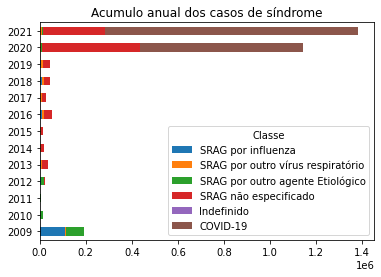

In [12]:
ax = SRAG_balance.plot(
    kind = 'barh',
    stacked = True,
    title = 'Acumulo anual dos casos de síndrome',
    mark_right = True
)
ax.figure.savefig(f'{RESULTS}/balance/2009-2021.png')

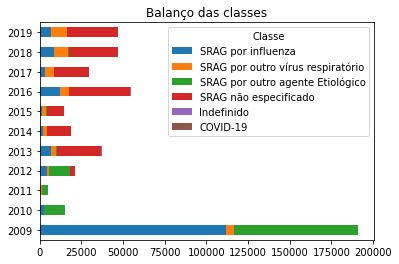

In [13]:
ax = SRAG_balance.loc['2009':'2019'].plot(
    # x = 'Name',
    kind = 'barh',
    stacked = True,
    title = 'Balanço das classes',
    mark_right = True
)
ax.figure.savefig(f'{RESULTS}/balance/2009-2019.png')
# df_total = pd.DataFrame()
# for col in SRAG_balance.columns:
#     df_total += SRAG_balance[col]
# df_rel = SRAG_balance[SRAG_balance.columns].div(df_total, 0) * 100
  
# for n in df_rel:
#     for i, (cs, ab, pc) in enumerate(zip(
#         SRAG_balance.cumsum(1)[n], 
#         SRAG_balance[n],
#         df_rel[n])):
#         plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
#                  va = 'center', ha = 'center', rotation = 20, fontsize = 8)

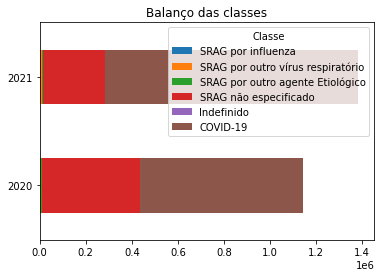

In [14]:
ax = SRAG_balance.loc[['2020','2021']].plot(
    # x = 'Name',
    kind = 'barh',
    stacked = True,
    title = 'Balanço das classes',
    mark_right = True
)
ax.figure.savefig(f'{RESULTS}/balance/2020-2021.png')

Reclassificação

In [15]:
df = pd.DataFrame()
for file in files:
    print(f'[INFO] Opening {file}')
    year = file.split('/')[-1][:-7]
    aux = pd.read_csv(
        file,
        low_memory=False,
        compression='gzip',
        #usecols=[*cols_in_all, 'TP_IDADE'],
    )
    aux['source_year'] = year
    aux['NU_IDADE_N'] = aux.apply(lambda r: cod2age(r['NU_IDADE_N'], r.get('TP_IDADE', None)), axis=1)
    df = pd.concat([df, aux[[*cols_in_all, 'source_year']]], ignore_index=True)
df.to_csv(f'{RAW_DATA}/SRAG.csv.gz', index=False, compression='gzip')
df

[INFO] Opening datas/raw/2009.csv.gz
[INFO] Opening datas/raw/2010.csv.gz
[INFO] Opening datas/raw/2011.csv.gz
[INFO] Opening datas/raw/2012.csv.gz
[INFO] Opening datas/raw/2013.csv.gz
[INFO] Opening datas/raw/2014.csv.gz
[INFO] Opening datas/raw/2015.csv.gz
[INFO] Opening datas/raw/2016.csv.gz
[INFO] Opening datas/raw/2017.csv.gz
[INFO] Opening datas/raw/2018.csv.gz
[INFO] Opening datas/raw/2019.csv.gz
[INFO] Opening datas/raw/2020.csv.gz
[INFO] Opening datas/raw/2021.csv.gz


,DT_NOTIFIC,ID_MUNICIP,SEM_NOT,SG_UF_NOT,DT_SIN_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NEUROLOGIC,OBESIDADE,PUERPERA,SIND_DOWN,UTI,DESC_RESP,SATURACAO,ANTIVIRAL,SUPORT_VEN,source_year
0,10/12/2009,110020,200949,11,09/12/2009,06/04/1953,57,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
1,14/08/2009,500270,200932,50,07/08/2009,12/06/1990,19,M,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
2,14/08/2009,500270,200932,50,10/08/2009,06/11/1989,19,M,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,09/09/2009,110002,200936,11,09/09/2009,24/10/2008,1,F,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,10/08/2009,310620,200932,31,03/08/2009,15/01/2009,0,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223125,09/05/2021,FORTALEZA,19,CE,03/05/2021,25/07/1960,60,M,6.0,4.0,...,2.0,2.0,9.0,2.0,2.0,1.0,2.0,9.0,2.0,2021
3223126,26/09/2021,CAMPINAS,39,SP,26/09/2021,15/12/1927,93,F,5.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2021
3223127,20/09/2021,GOIANIA,38,GO,17/09/2021,22/12/1984,36,M,6.0,4.0,...,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2021
3223128,01/10/2021,SALVADOR,39,BA,28/09/2021,19/09/2011,10,M,6.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2021


In [16]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223130 entries, 0 to 3223129
Data columns (total 59 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DT_NOTIFIC   3223129 non-null  object 
 1   ID_MUNICIP   3223130 non-null  object 
 2   SEM_NOT      3223130 non-null  int64  
 3   SG_UF_NOT    3223130 non-null  object 
 4   DT_SIN_PRI   3223130 non-null  object 
 5   DT_NASC      3214660 non-null  object 
 6   NU_IDADE_N   3223130 non-null  int64  
 7   CS_SEXO      3223130 non-null  object 
 8   CS_GESTANT   3223037 non-null  float64
 9   CS_RACA      3155554 non-null  float64
 10  CS_ESCOL_N   2276836 non-null  float64
 11  SG_UF        3222755 non-null  object 
 12  ID_MN_RESI   3222755 non-null  object 
 13  VACINA       2517145 non-null  float64
 14  FEBRE        2785299 non-null  float64
 15  TOSSE        2875070 non-null  float64
 16  DISPNEIA     2885199 non-null  float64
 17  GARGANTA     2437139 non-null  float64
 18  DI

Filtrando os atributos de interesse

In [17]:
symptoms = {
    'FEBRE': 'febre',#
    'TOSSE': 'tosse',#
    'GARGANTA': 'dor de garganta',#
    'DISPNEIA': 'dispneia',#
    'DIARREIA': 'diarréia',#
    'DESC_RESP': 'desconforto respiratório',#
    'SATURACAO': 'saturação baixa',#
    #'VOMITO': 'vomito',
}

comorbidities = {
    'CARDIOPATI': 'cardiopatia',#
    'PNEUMOPATI': 'pneumopatia',#
    'RENAL': 'doença renal',#
    'IMUNODEPRE': 'imunodepressão',#
    'HEPATICA': 'doença hepática',#
    'NEUROLOGIC': 'doença neurológica',#
    'OBESIDADE': 'obesidade',#
    'PUERPERA': 'puérpera',#
    'SIND_DOWN': 'síndrome de Down',#
    #'HEMATOLOGI': 'hematológica',
    #'ASMA': 'asma',
    #'DIABETES': 'diabetes',
}

interest_cols = {
    **symptoms,
    **comorbidities,
    'CS_SEXO': 'sexo',#
    'NU_IDADE_N': 'idade',#
    'CLASSI_FIN': 'SRAG',#
    # 'EVOLUCAO': 'desfecho',#
    'source_year': 'ano fonte',#
}

cols_droped = [
    'DT_NOTIFIC',#
    'ID_MUNICIP',#
    'SEM_NOT',#
    'SG_UF_NOT',#
    'DT_SIN_PRI',#
    'DT_NASC',#
    'CS_GESTANT',#
    'CS_RACA',#
    'CS_ESCOL_N',#
    'SG_UF',#
    'ID_MN_RESI',#
    'VACINA',#
    'OUTRO_SIN',#
    'OUTRO_DES',#
    'OUT_MORBI',#
    'MORB_DESC',#
    'HOSPITAL',#
    'DT_INTERNA',#
    'CO_MU_INTE',#
    'DT_PCR',#
    'DT_RAIOX',#
    'RAIOX_RES',#
    'RAIOX_OUT',#
    'CLASSI_OUT',#
    'CRITERIO',#
    'DT_ENCERRA',#
    'DT_DIGITA',#
    'OBES_IMC',#
    'OUT_AMOST',#
    'OUT_ANTIV',#
    'DT_COLETA',#
    'DT_ENTUTI',#
    'DT_ANTIVIR',#
    'DT_SAIDUTI',#
    'AMOSTRA',#
    'UTI',#
    'ANTIVIRAL',#
    'SUPORT_VEN',#
    'EVOLUCAO',#
]

In [18]:
df = pd.read_csv(f'{RAW_DATA}/SRAG.csv.gz', compression='gzip', usecols=interest_cols.keys())
df.rename(columns=interest_cols, inplace=True)
df.to_csv(f'{RAW_DATA}/SRAG_filtered.csv.gz', index=False, compression='gzip')
df

,idade,sexo,febre,tosse,dispneia,dor de garganta,diarréia,cardiopatia,pneumopatia,doença renal,imunodepressão,SRAG,doença hepática,doença neurológica,obesidade,puérpera,síndrome de Down,desconforto respiratório,saturação baixa,ano fonte
0,57,M,1.0,1.0,1.0,2.0,1.0,9.0,9.0,9.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
1,19,M,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
2,19,M,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,1,F,1.0,1.0,2.0,1.0,2.0,9.0,9.0,9.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,0,M,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223125,60,M,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,9.0,2.0,1.0,2.0,2021
3223126,93,F,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2021
3223127,36,M,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021
3223128,10,M,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2021


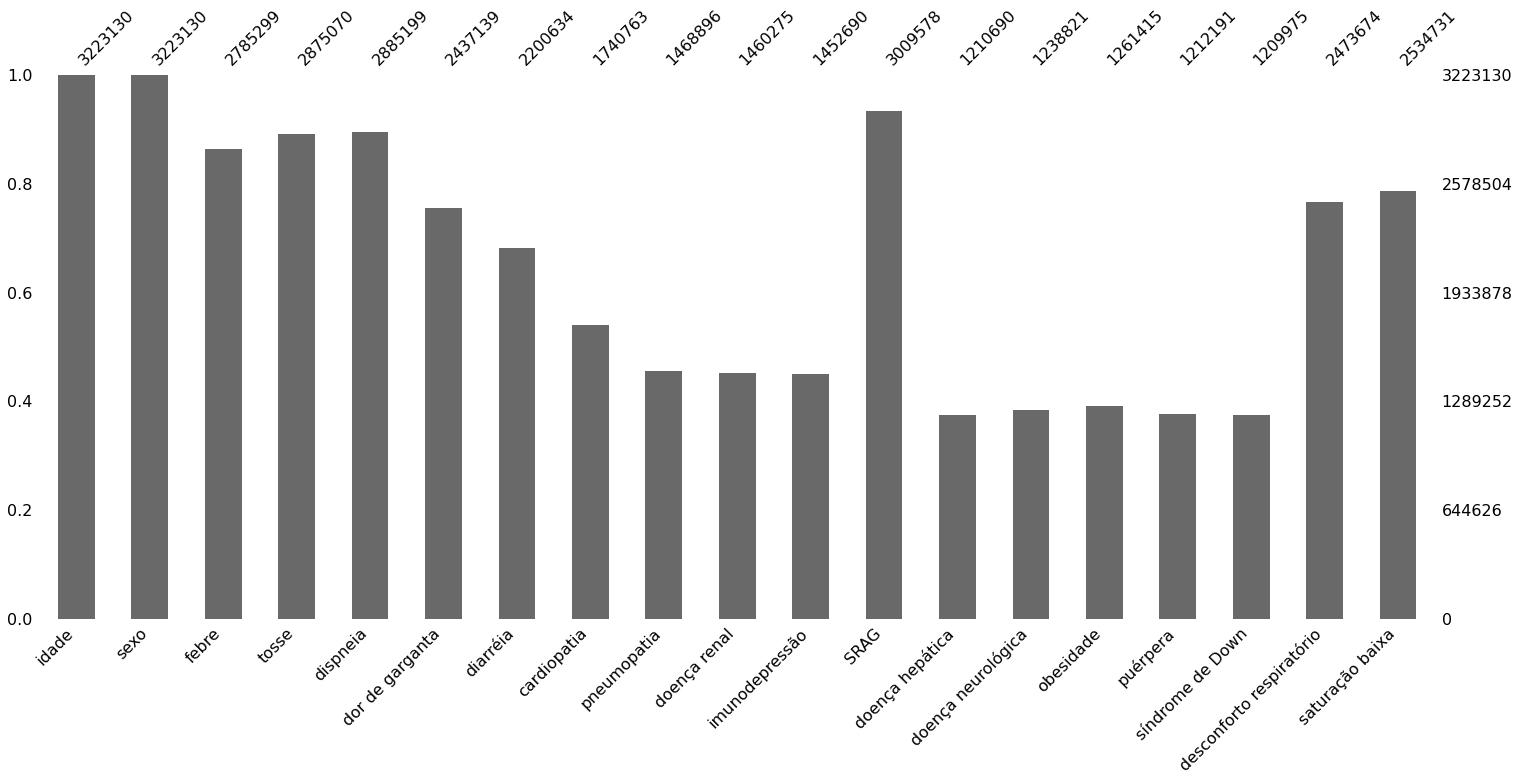

In [19]:
aux = df[[c for c in df.columns if c not in ['ano fonte']]]
fig = msno.bar(aux, labels=True) # fontsize=7
fig_copy = fig.get_figure()
fig_copy.savefig(f'{RESULTS}/missing/bar.png')

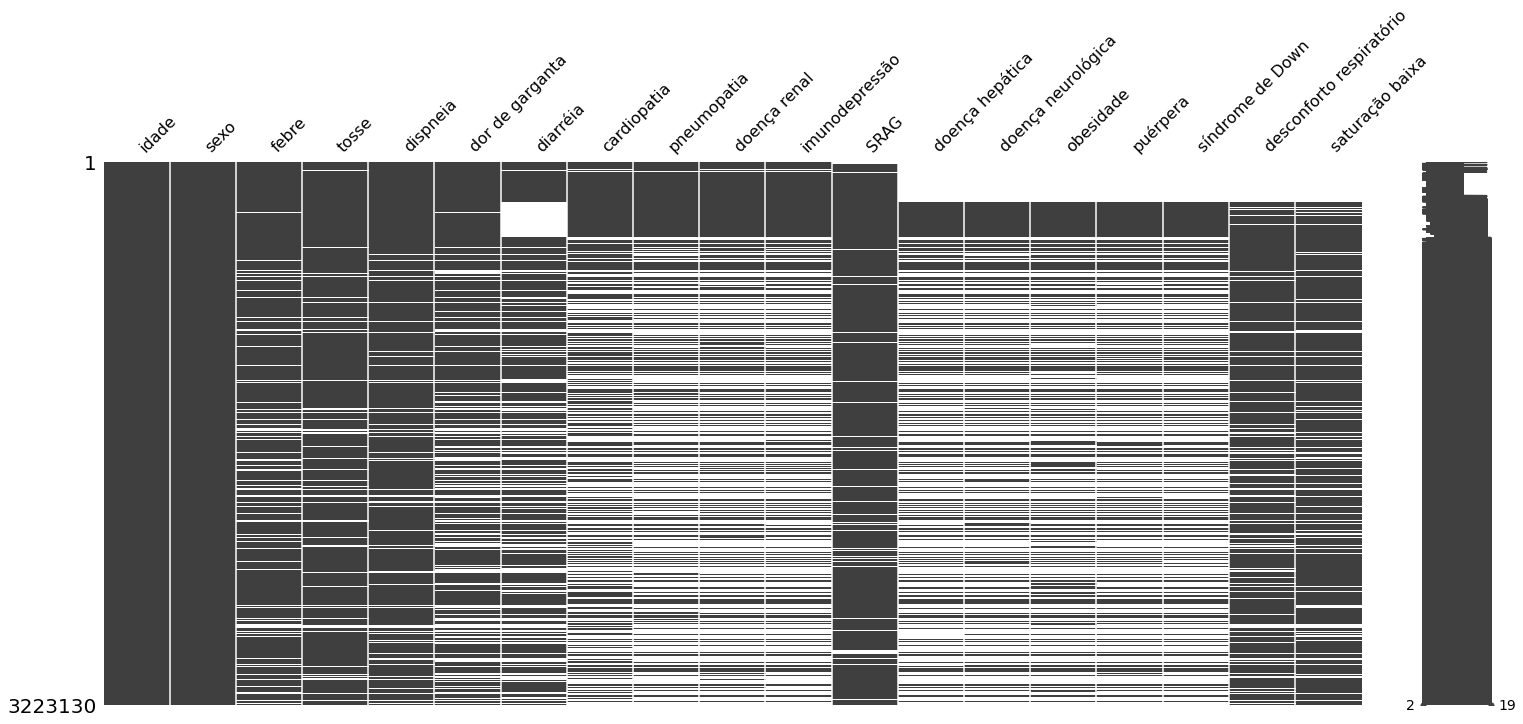

In [20]:
aux = df[[c for c in df.columns if c not in ['ano fonte']]]
fig = msno.matrix(aux) # fontsize=7
fig_copy = fig.get_figure()
fig_copy.savefig(f'{RESULTS}/missing/matrix.png')

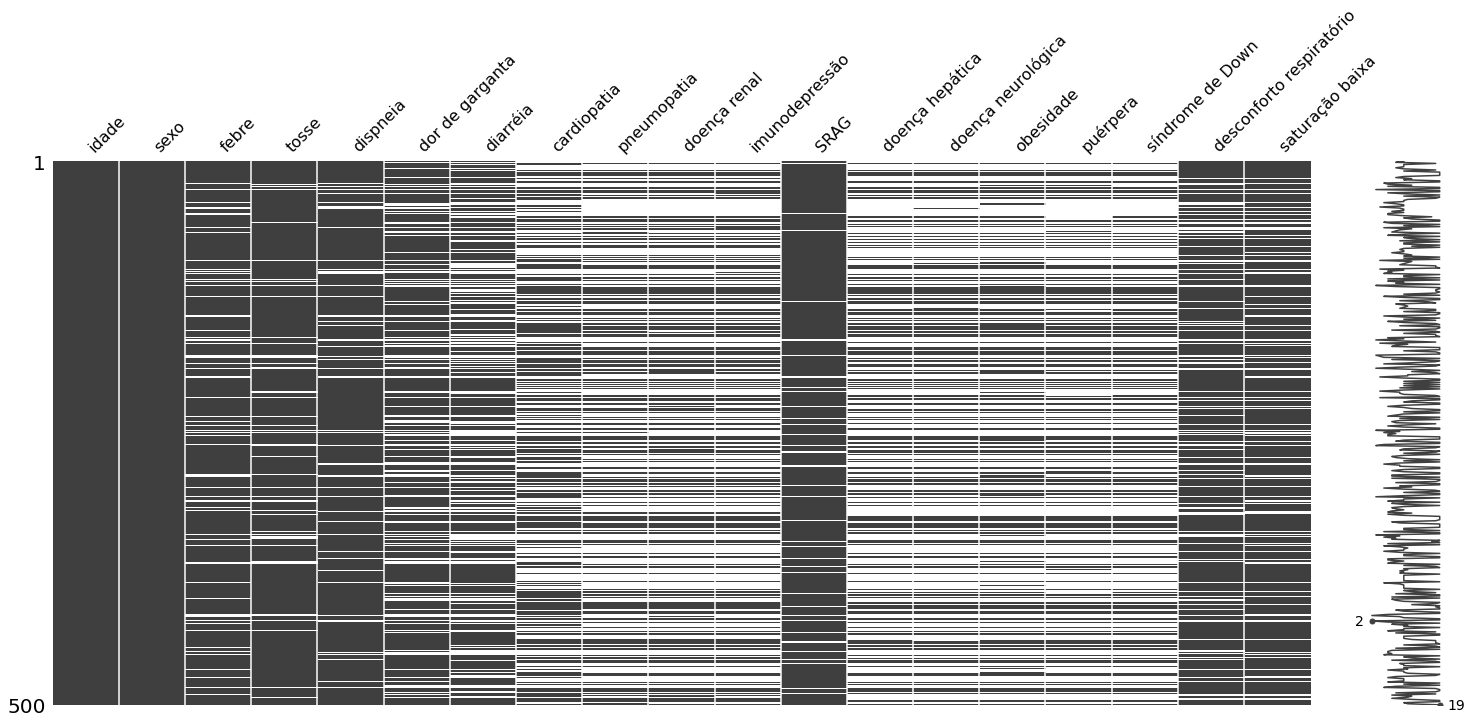

In [21]:
aux = df[[c for c in df.columns if c not in ['ano fonte']]].sample(500)
fig = msno.matrix(aux) # fontsize=7
fig_copy = fig.get_figure()
fig_copy.savefig(f'{RESULTS}/missing/matrix.png')

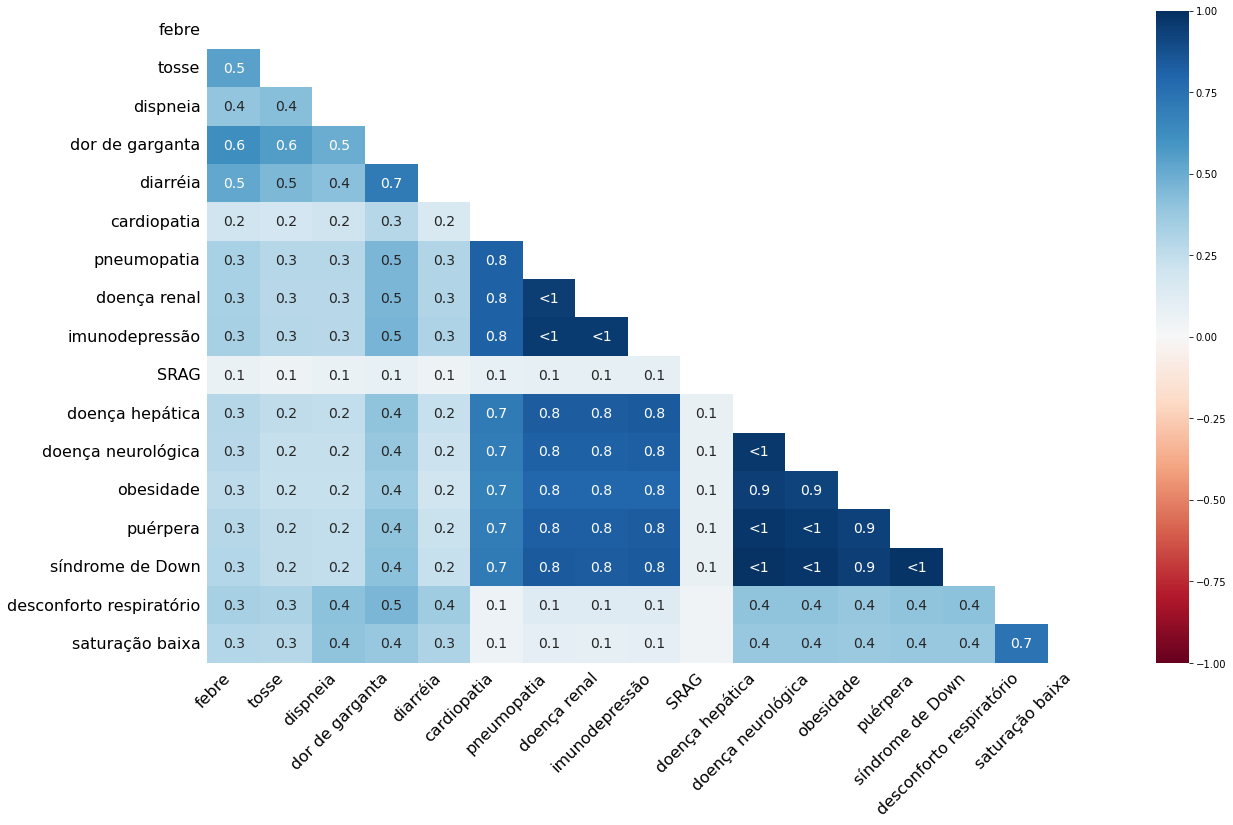

In [22]:
aux = df[[c for c in df.columns if c not in ['ano fonte']]]
fig = msno.heatmap(aux, labels=True) # fontsize=7
fig_copy = fig.get_figure()
fig_copy.savefig(f'{RESULTS}/missing/heatmap.png')

In [23]:
aux = df.copy()
aux.dropna()

,idade,sexo,febre,tosse,dispneia,dor de garganta,diarréia,cardiopatia,pneumopatia,doença renal,imunodepressão,SRAG,doença hepática,doença neurológica,obesidade,puérpera,síndrome de Down,desconforto respiratório,saturação baixa,ano fonte
449979,39,M,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2019
449992,84,M,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2019
449994,38,F,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2019
449998,58,M,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2019
450011,5,M,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223116,61,F,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2021
3223120,78,F,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2021
3223121,71,F,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2021
3223125,60,M,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,9.0,2.0,1.0,2.0,2021


Reclassificação

In [24]:
missing = df.isnull().mean() * 100
missing

idade                        0.000000
sexo                         0.000000
febre                       13.584032
tosse                       10.798820
dispneia                    10.484560
dor de garganta             24.385954
diarréia                    31.723697
cardiopatia                 45.991536
pneumopatia                 54.426412
doença renal                54.693885
imunodepressão              54.929215
SRAG                         6.625609
doença hepática             62.437444
doença neurológica          61.564659
obesidade                   60.863664
puérpera                    62.390875
síndrome de Down            62.459628
desconforto respiratório    23.252429
saturação baixa             21.358090
ano fonte                    0.000000
dtype: float64

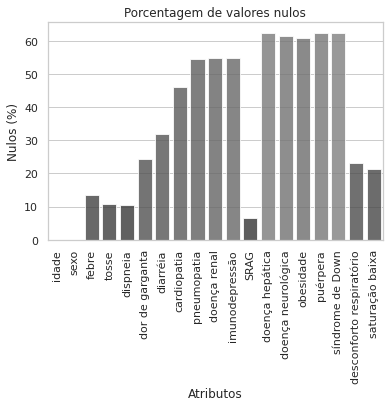

In [25]:
sns.set(style="whitegrid", color_codes=True)
# pal = sns.color_palette("Greens_d", len(missing))
# pal = sns.color_palette("ch:s=0,rot=0", len(missing))
pal = sns.color_palette("dark:grey_r", len(missing))
rank = missing.argsort().argsort()

plt.figure()
# splot = sns.barplot(x=missing.index[:-1], y=missing.values[:-1], palette=pal, alpha=0.8)
splot = sns.barplot(x=missing.index[:-1], y=missing.values[:-1], palette=np.array(pal[::-1])[rank], alpha=0.8)
plt.title('Porcentagem de valores nulos')
plt.ylabel('Nulos (%)', fontsize=12)
plt.xlabel('Atributos', fontsize=12)
plt.xticks(rotation=90)

fig = splot.get_figure()
fig.savefig(f'{RESULTS}/missing/percent.png')
plt.show()

Filtrando

In [26]:
missing[missing > 50]

pneumopatia           54.426412
doença renal          54.693885
imunodepressão        54.929215
doença hepática       62.437444
doença neurológica    61.564659
obesidade             60.863664
puérpera              62.390875
síndrome de Down      62.459628
dtype: float64

In [27]:
df = pd.read_csv(f'{RAW_DATA}/SRAG_filtered.csv.gz', compression='gzip')
df = df.drop(columns=missing[missing > 50].index)
df.to_csv(f'{RAW_DATA}/SRAG_filtered_nans.csv.gz', index=False, compression='gzip')
df

,idade,sexo,febre,tosse,dispneia,dor de garganta,diarréia,cardiopatia,SRAG,desconforto respiratório,saturação baixa,ano fonte
0,57,M,1.0,1.0,1.0,2.0,1.0,9.0,1.0,NaN,NaN,2009
1,19,M,1.0,1.0,1.0,2.0,2.0,2.0,3.0,NaN,NaN,2009
2,19,M,1.0,1.0,NaN,2.0,2.0,2.0,3.0,NaN,NaN,2009
3,1,F,1.0,1.0,2.0,1.0,2.0,9.0,3.0,NaN,NaN,2009
4,0,M,1.0,1.0,1.0,2.0,2.0,2.0,3.0,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
3223125,60,M,2.0,1.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,2021
3223126,93,F,1.0,2.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0,2021
3223127,36,M,1.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,2021
3223128,10,M,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2021


|sintomas|comorbidades|sexo|SRAG|desfecho|
|--|--|--|--|--|
|1. Sim|1. Sim|F: Feminino|1. SRAG por influenza|1. Cura|
|2. Não|2. Não|M: Masculino|2. SRAG por outro vírus respiratório|2. Óbito ou agravamento (UTI)|
|9. Ignorado|9. Ignorado||3. SRAG por outro agente Etiológico|9. Ignorado|
||||4. SRAG não especificado||
||||5. COVID-19||

Normalização

In [28]:
df = pd.read_csv(f'{RAW_DATA}/SRAG_filtered_nans.csv.gz', compression='gzip')
df.loc[df['ano fonte'].isin(range(2009,2020)), 'SRAG'] = 0

rules = []
rules.append({'cols': 'SRAG', 'replaces': {1: 0, 2: 0, 3: 0, 5: 1}})
rules.append({'cols': 'sexo', 'replaces': {'M': 1, 'F': 2, 'I': 9}})

df = clean(df, rules)
df = df[df['SRAG'].isin([0,1])]
df.to_csv(f'{RAW_DATA}/SRAG_clean.csv.gz', index=False, compression='gzip')
df

,idade,sexo,febre,tosse,dispneia,dor de garganta,diarréia,cardiopatia,SRAG,desconforto respiratório,saturação baixa,ano fonte
0,57,1,1.0,1.0,1.0,2.0,1.0,9.0,0.0,NaN,NaN,2009
1,19,1,1.0,1.0,1.0,2.0,2.0,2.0,0.0,NaN,NaN,2009
2,19,1,1.0,1.0,NaN,2.0,2.0,2.0,0.0,NaN,NaN,2009
3,1,2,1.0,1.0,2.0,1.0,2.0,9.0,0.0,NaN,NaN,2009
4,0,1,1.0,1.0,1.0,2.0,2.0,2.0,0.0,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
3223117,33,1,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,2021
3223118,57,1,1.0,1.0,1.0,2.0,2.0,NaN,1.0,1.0,1.0,2021
3223119,35,1,1.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0,1.0,2021
3223120,78,2,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2021


Balanceamento

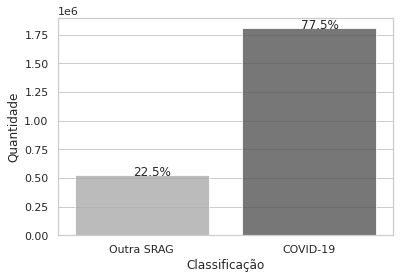

In [29]:
def without_hue(plot, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


df_class = df.groupby('SRAG').size()
df_class.rename({
    0.0: 'Outra SRAG',
    1.0: 'COVID-19',
}, inplace=True)
#df_class.plot(kind='barh')
ax = sns.barplot(x=df_class.index, y=df_class.values, palette="gray_r", alpha=0.8)
# plt.title('Balanço das classes')
# plt.yticks(size=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Classificação', fontsize=12)

fig = splot.get_figure()
fig.savefig(f'{RESULTS}/balance/general.png')

without_hue(ax, len(df))
# plt.show()

In [30]:
missing = df.isnull().mean() * 100
missing

idade                        0.000000
sexo                         0.000000
febre                       12.111508
tosse                        9.719357
dispneia                     9.411929
dor de garganta             22.788994
diarréia                    32.519414
cardiopatia                 43.171088
SRAG                         0.000000
desconforto respiratório    24.985454
saturação baixa             22.611698
ano fonte                    0.000000
dtype: float64

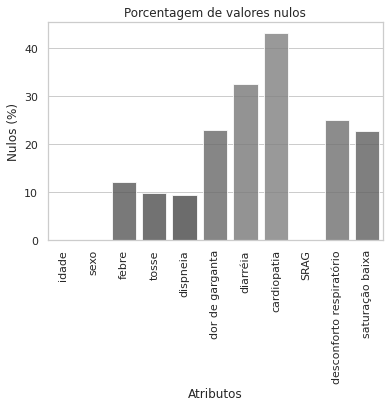

In [31]:
sns.set(style="whitegrid", color_codes=True)
# pal = sns.color_palette("Greens_d", len(missing))
pal = sns.color_palette("dark:grey_r", len(missing))
rank = missing.argsort().argsort()

plt.figure()
splot = sns.barplot(x=missing.index[:-1], y=missing.values[:-1], palette=np.array(pal[::-1])[rank], alpha=0.8)
plt.title('Porcentagem de valores nulos')
plt.ylabel('Nulos (%)', fontsize=12)
plt.xlabel('Atributos', fontsize=12)
plt.xticks(rotation=90)

fig = splot.get_figure()
fig.savefig(f'{RESULTS}/missing/percent_after_clean.png')
plt.show()

In [32]:
sc_cols = set([*symptoms.values(), *comorbidities.values()])
cols = set(df.columns)
it_cols = list(cols.intersection(sc_cols))

In [33]:
df = pd.read_csv(f'{RAW_DATA}/SRAG_clean.csv.gz', compression='gzip')

rules = []
rules.append({'cols': it_cols, 'replaces': {np.nan: 0.}})

df = clean(df, rules)
df.to_csv(f'{PROCESSED_DATA}/SRAG.csv.gz', index=False, compression='gzip')
df

,idade,sexo,febre,tosse,dispneia,dor de garganta,diarréia,cardiopatia,SRAG,desconforto respiratório,saturação baixa,ano fonte
0,57,1,1.0,1.0,1.0,2.0,1.0,9.0,0.0,0.0,0.0,2009
1,19,1,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2009
2,19,1,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2009
3,1,2,1.0,1.0,2.0,1.0,2.0,9.0,0.0,0.0,0.0,2009
4,0,1,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
2332248,33,1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2021
2332249,57,1,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,2021
2332250,35,1,1.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,1.0,2021
2332251,78,2,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2021


In [34]:
missing = df.isnull().mean() * 100
missing

idade                       0.0
sexo                        0.0
febre                       0.0
tosse                       0.0
dispneia                    0.0
dor de garganta             0.0
diarréia                    0.0
cardiopatia                 0.0
SRAG                        0.0
desconforto respiratório    0.0
saturação baixa             0.0
ano fonte                   0.0
dtype: float64